# INFOMCDMMC Critical Data Mining of Media Culture

## Utrecht University, MSc Applied Data Science


### Team members:
* Meagan Loerakker, m.b.loerakker@students.uu.nl
* Celesta Terwisscha van Scheltinga, c.c.m.terwisschavanscheltinga@students.uu.nl
* Nina Alblas, n.m.alblas@students.uu.nl
* Berber van Drunen, b.p.vandrunen@students.uu.nl
* Debarupa Roy Choudhury, d.roychoudhury@students.uu.nl

# Applying Tf-Idf and K-Means

In [ ]:
#Stats
import pandas as pd

#Tf-Idf and KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from kneed import KneeLocator

#Support
import re
import string
import random

#Visualisation
import matplotlib.pyplot as plt

In [5]:
# load data
news_ai_df = pd.read_csv("data/preprocessed_data.csv").iloc[:, 1:]
news_ai_df

,filename,outlet,title,description,datetime,body,year,month,preprocessed_description,preprocessed_body
0,2010-06-gears-of-war-3-beast.html,Wired,Gears of War 3 Co-op Makes Beasts of Gamers,"LOS ANGELES — Back in 2008, Gears of War 2 int...",2010-06-17 16:22:00.000,"LOS ANGELES – Back in 2008, Gears of War 2 in...",2010,6,los angeles gear war introduced horde mode co ...,los angeles gear war introduced horde mode co ...
1,sponsored-story-innovating-for-the-individual....,Wired,WIRED Brand Lab | Innovating for the Individual,What every leader can learn from the technolog...,2021-08-27 12:14:31.296,Innovative technology is making healthcare mor...,2021,8,leader learn transforming healthcare,innovative making healthcare personal bit inge...
2,ttps:--www.wired.com-story-for-all-mankind-bes...,Wired,‘For All Mankind’ Is the Best Sci-Fi of Its Era,The Apple TV+ alternate history series is simp...,2022-06-09 07:00:00.000,"New Star Wars, new Star Trek, Russian Doll, Se...",2022,6,apple tv alternate history series ambitious th...,new star war new star trek russian doll severa...
3,story-ghostery-open-source-new-business-model....,Wired,Ad-Blocker Ghostery Just Went Open Source—And ...,"Ghostery, Edward Snowden’s preferred ad-blocke...",2018-03-08 09:45:00.000,"In privacy-focused, anti-establishment corners...",2018,3,ghostery edward snowden preferred ad blocker d...,privacy focused anti establishment corner inte...
4,story-best-game-subscriptions.html,Wired,Too Many Game Subscription Services? Here’s Ho...,PlayStation Plus Extra or Plus Premium? Xbox L...,2022-04-11 10:00:00.000,Gaming is starting to look more and more like...,2022,4,playstation extra plus premium xbox live gold ...,gaming starting look netflix buying disc store...
...,...,...,...,...,...,...,...,...,...,...
17427,bits.blogs.nytimes.com-2014-01-01-big-data-shr...,NYT,Big Data Shrinks to Grow,It was a good year for Big Data — the term at ...,2014-01-01 16:00:55.000,"In fact, it may be underway. Google Trends sh...",2014,1,good big data term least industry mass data su...,fact underway google trend show search term bi...
17428,2013-06-09-us-revelations-give-look-at-spy-age...,NYT,How the U.S. Uses Technology to Mine More Data...,A revolution in software technology has transf...,2013-06-09 01:43:16.000,WASHINGTON — When American analysts hunting te...,2013,6,revolution software transformed national secur...,american analyst hunting terrorist sought new ...
17429,krugman.blogs.nytimes.com-2013-08-18-the-dynam...,NYT,The Dynamo and Big Data,These things take time.,2013-08-18 15:43:43.000,James Glanz relays skepticism about the econom...,2013,8,thing take,james glanz relay skepticism economic impact b...
17430,dealbook.nytimes.com-2012-03-26-morning-take-o...,NYT,Morning Take-Out,Highlights from the DealBook newsletter.,2012-03-26 14:23:58.000,E-Mail to Corzine Said Transfer Was Not Custom...,2012,3,highlight dealbook newsletter,e mail corzine transfer customer money jon cor...


In [8]:
def kmeans(outlet):
    """
    Applies tf-idf and k-means to the articles from a specific
    'outlet', produces a knee plot to find the optimal number
    of clusters, prints the words for each cluster (i.e., topic),
    assigns a topic label to each article in the data frame,
    and saves this data frame as a .csv file.
    """
    
    outlet_df = news_ai_df[news_ai_df["outlet"] == outlet]
    
    # Vectorize and calculate TF-IDF
    vectorizer = TfidfVectorizer(min_df=20, max_df=0.4)
    X = vectorizer.fit_transform(outlet_df["preprocessed_body"])
    tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

    # Calculate optimal number of clusters and add column to the dataframe 
    # that indicates the cluster an article belongs to
    inertia = []

    K = range(1, 20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k,random_state=0)
        kmeanModel.fit(tf_idf)
        inertia.append(kmeanModel.inertia_)

    kn = KneeLocator(K, inertia, curve='convex', direction='decreasing')
    clusters = kn.knee

    # Create a line plot using K-Means
    plt.figure(figsize=(10,5))
    plt.xlabel('number of clusters k')
    plt.ylabel('Sum of squared distances')
    plt.xticks( range(1, 20))
    plt.plot(K, inertia, 'bx-')
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

    # Enter recommended number of clusters and add k_means as a new column in the dataframe
    kmeanModel = KMeans(n_clusters=clusters, init='k-means++', max_iter=3000, random_state=0)
    mod = kmeanModel.fit_transform(tf_idf)

    # Print the top 10 words per cluster
    order_centroids = kmeanModel.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(clusters):
        print("%d" % i, sep='', end=','),
        for ind in order_centroids[i, :10]:
            print(terms[ind], sep='', end=',')
        print('')

    # Add the labels to the df
    outlet_df['kmeans_clusters'] = kmeanModel.labels_
        
    outlet_df.to_csv(f"data/df_{outlet}.csv", header=True)


0,china,chinese,united,job,government,worker,country,national,economy,economic,
1,game,player,algorithm,better,sport,percent,play,researcher,human,chess,
2,robot,bot,learn,human,question,brain,assistant,child,neural,mind,
3,voice,comment,content,news,reader,video,software,election,director,brand,
4,health,patient,cancer,medical,medicine,doctor,care,mental,disease,hospital,
5,home,camera,device,amazon,baby,app,parent,privacy,photo,feature,
6,musk,elon,tesla,human,weapon,humanity,super,gate,hawking,warning,
7,vehicle,car,driving,driver,self,crash,autonomous,tesla,road,sensor,
8,military,defense,pentagon,drone,contract,weapon,employee,autonomous,force,project,
9,facial,recognition,law,police,enforcement,agency,privacy,face,right,tool,
10,artist,art,image,chinese,instagram,june,show,fair,night,project,
11,music,climate,apple,travel,change,consumer,trend,ibm,siri,style,
12,facebook,content,video,medium,social,fake,trump,post,network,user,
13,university,student,business,president,school,ibm,

/Users/ninaalblas/opt/anaconda3/envs/proglab/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


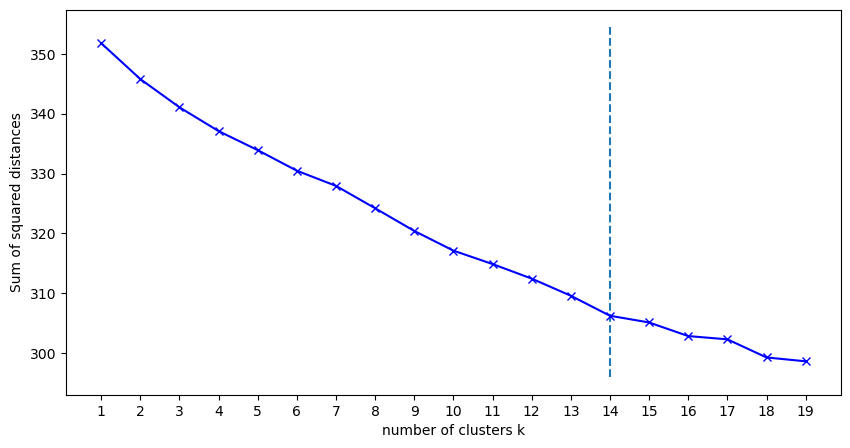

In [9]:
random.seed(6)
kmeans("WashingtonPost")

0,google,chip,server,quantum,intel,cloud,search,learning,computing,machine,
1,climate,carbon,energy,water,emission,plant,specie,tree,fire,scientist,
2,facebook,zuckerberg,ad,user,platform,instagram,content,social,speech,trump,
3,apple,app,apps,device,iphone,android,phone,google,user,password,
4,car,vehicle,driver,uber,driving,tesla,electric,battery,ride,autonomous,
5,movie,film,show,book,video,content,service,feel,site,netflix,
6,space,nasa,earth,satellite,force,moon,astronaut,mission,orbit,planet,
7,originates,viewed,site,content,happened,trump,takeaway,president,twitter,impeachment,
8,government,china,law,twitter,trump,platform,chinese,user,state,social,
9,robot,health,machine,patient,learning,algorithm,researcher,brain,disease,research,
10,best,amazon,phone,price,deal,sale,favorite,buy,guide,subscription,
11,game,player,play,gaming,character,console,playing,xbox,video,nintendo,
12,security,attack,hacker,ransomware,vulnerability,attacker,malware,hacking,device,group,


/Users/ninaalblas/opt/anaconda3/envs/proglab/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


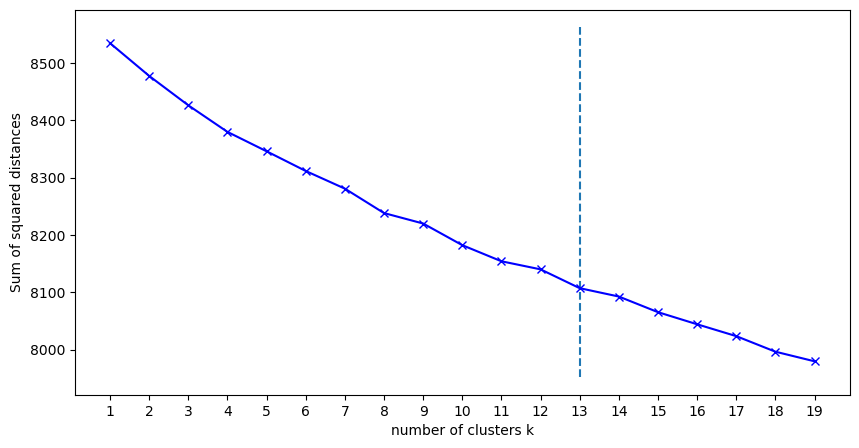

In [10]:
random.seed(3)
kmeans("Wired")

0,ibm,watson,rometty,cloud,software,computing,revenue,service,analyst,computer,
1,worker,job,information,health,percent,care,start,service,patient,privacy,
2,trump,briefing,morning,china,biden,official,republican,election,today,russia,
3,bank,wsj,bloomberg,trump,deal,fund,investor,percent,ft,stock,
4,book,film,story,game,show,novel,movie,pm,character,music,
5,robot,machine,car,computer,autonomous,vehicle,driving,researcher,human,research,
6,cloud,microsoft,computing,software,chip,amazon,intel,customer,hp,server,
7,bee,spelling,glossary,letter,monicat,pangrams,σa,term,word,crossword,
8,google,apple,search,amazon,assistant,device,employee,alexa,phone,iphone,
9,student,school,university,college,education,course,graduated,bride,groom,teacher,
10,art,artist,museum,exhibition,gallery,painting,show,sculpture,chinese,installation,
11,china,chinese,united,beijing,trade,trump,huawei,official,administration,xi,
12,facebook,user,content,privacy,zuckerberg,facial,video,ad,social,platform,


/Users/ninaalblas/opt/anaconda3/envs/proglab/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


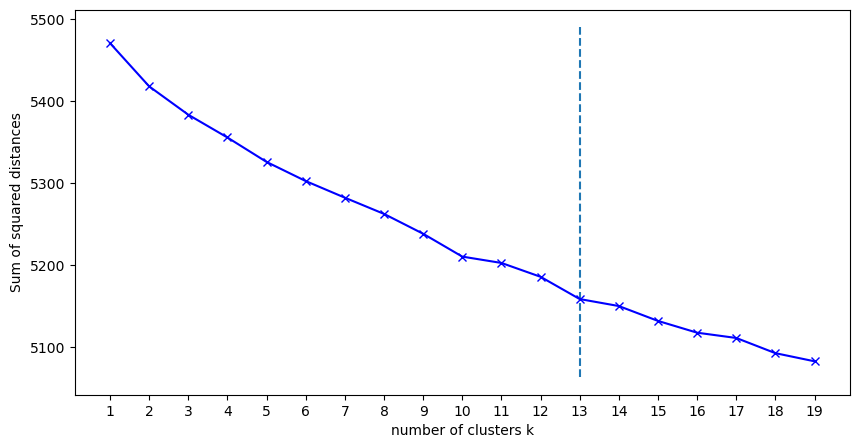

In [11]:
random.seed(3)
kmeans("NYT")

0,bot,microsoft,tay,chatbot,user,twitter,chatbots,tweet,conversation,say,
1,weapon,autonomous,ban,killer,military,robot,drone,un,international,war,
2,say,algorithm,human,learning,brain,science,turing,film,story,university,
3,robot,human,sex,robotics,say,robotic,child,job,art,look,
4,big,government,facebook,google,information,public,business,service,user,say,
5,job,worker,automation,robot,labour,report,employment,economy,income,skill,
6,car,driver,tesla,vehicle,driving,autopilot,autonomous,road,driverless,self,
7,patient,cancer,nh,health,hospital,medical,healthcare,disease,doctor,treatment,
8,game,player,alphago,deepmind,chess,lee,hassabis,match,play,playing,


/Users/ninaalblas/opt/anaconda3/envs/proglab/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


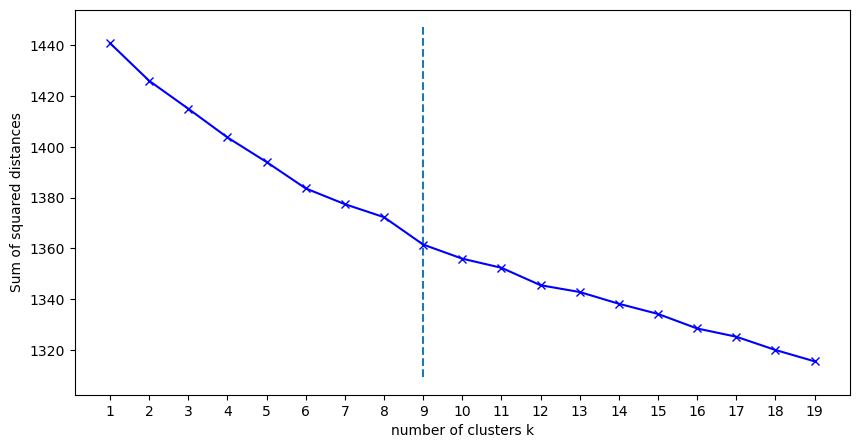

In [12]:
random.seed(2)
kmeans("Guardian")

0,computer,machine,big,film,life,human,job,future,show,real,
1,google,assistant,apple,siri,feature,employee,voice,camera,phone,device,
2,image,video,neural,network,photo,face,researcher,algorithm,tool,learning,
3,game,player,alphago,sedol,deepmind,go,match,chess,playing,move,
4,facebook,zuckerberg,user,ad,cambridge,social,profile,photo,mark,content,
5,autonomous,police,government,car,city,report,security,information,weapon,vehicle,
6,robot,object,human,bot,task,robotics,university,robotic,machine,researcher,
7,watson,ibm,supercomputer,brain,computing,cancer,chip,computer,national,doctor,


/Users/ninaalblas/opt/anaconda3/envs/proglab/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


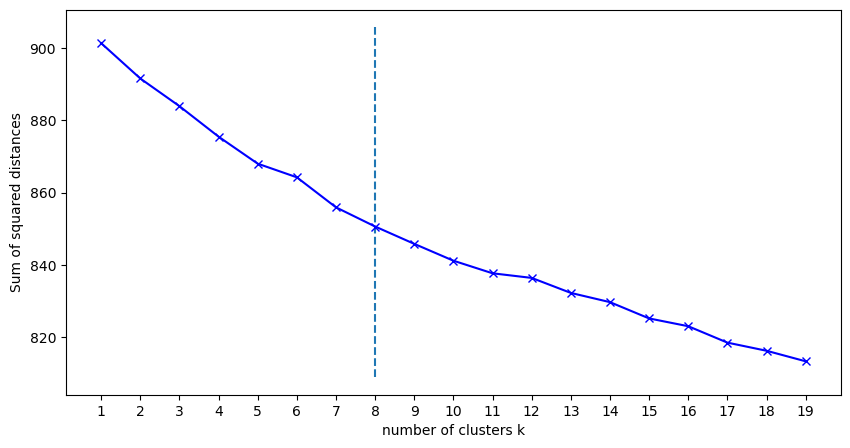

In [13]:
random.seed(2)
kmeans("Gizmodo")